In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def mostra_imagem_rgb(imagem):
    fig = plt.figure(figsize = (10, 10))
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    plt.imshow(imagem_rgb)

In [3]:
def acha_vermelho(imagem):
    # define range of blue color in HSV
    lower_red_1 = np.array([0,70,60])
    upper_red_1 = np.array([10,255,255])

    lower_red_2 = np.array([170,70,60])
    upper_red_2 = np.array([180,255,255])

    # convertendo para hsv
    hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

    # Threshold the HSV image to get only blue colors
    mask1 = cv2.inRange(hsv, lower_red_1, upper_red_1)
    mask2 = cv2.inRange(hsv, lower_red_2, upper_red_2)

    return np.add(mask1, mask2)

### Obtendo placa de exemplo

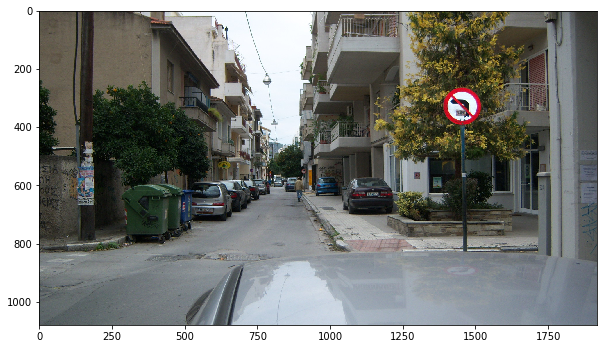

In [63]:
imagem_exemplo = cv2.imread("proibido_virar/07.jpg", cv2.IMREAD_COLOR)

mostra_imagem_rgb(imagem_exemplo)

In [53]:
imagem_exemplo_vermelho = acha_vermelho(imagem_exemplo)

In [67]:
placa_imagem_exemplo = imagem_exemplo[260:395, 1385:1525, :]

In [ ]:
vermelho_exemplo = acha_vermelho(placa_imagem_exemplo)

cv2.imwrite("template_1.jpg", vermelho_exemplo)
plt.imshow(vermelho_exemplo, cmap="gray")

### Achando placas

In [4]:
def desenha_retangulo(loc, template, imagem):
    im_copy = imagem.copy()
    (w, h) = template.shape[::-1]
    
    for (l, c) in zip(*loc[::-1]):
        cv2.rectangle(im_copy, (l, c), ((l + w), (c + h)), (0, 255, 0), 2)
        
    return im_copy

In [60]:
def desenha_circulo(loc, template, imagem):
    im_copy = imagem.copy()
    (w, h) = template.shape[:2]
    
    circle_center = [(int(l + w/2), int(c + h/2)) for (l, c) in zip(*loc[::-1])]
    
    radius = int(w/2)
    
    cv2.circle(im_copy, circle_center[0], radius, (0, 255, 0), 5)
    
    return im_copy

In [22]:
def acha_tamanho(template, imagem_vermelho, threshold):
    (w, h) = template.shape[:2]
    max_res = 0
    best_rescale = template
    loc = np.empty(2)
    
    for rescale_size in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]:
        print(rescale_size)
        new_w = int(np.ceil(rescale_size*w))
        new_h = int(np.ceil(rescale_size*h))
        
        resized_template = cv2.resize(template, (new_w, new_h)) 

        res = cv2.matchTemplate(imagem_vermelho, resized_template, cv2.TM_CCOEFF_NORMED)
        
        if res.max() > max_res:
            max_res = res.max()
            loc = np.where(res == max_res)
            best_rescale = resized_template
        
    return loc, best_rescale

In [ ]:
def acha_tamanho_2(template, imagem_vermelho, threshold):
    w, h = template.shape
    for rescale_size in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]:
        new_w = int(np.ceil(rescale_size*w))
        new_h = int(np.ceil(rescale_size*h))
        
        resized_template = cv2.resize(template, (new_w, new_h)) 

        res = cv2.matchTemplate(imagem_vermelho, resized_template, cv2.TM_CCOEFF_NORMED)

        loc = np.where(res >= threshold)

        if(len(loc[0]) != 0):
            return loc, resized_template

In [6]:
def acha_placa(template, imagem, threshold):
    imagem_vermelho = acha_vermelho(imagem)
    
    loc, resized_template = acha_tamanho(template, imagem_vermelho, threshold)
    imagem = desenha_retangulo(loc, resized_template, imagem)
    
    return imagem

In [26]:
def acha_placa_2(template, imagem, threshold):
    imagem_vermelho = acha_vermelho(imagem)
    
    loc, resized_template = acha_tamanho(template, imagem_vermelho, threshold)
    imagem = desenha_circulo(loc, resized_template, imagem)
    
    return imagem

In [8]:
template = cv2.imread("template_1.jpg", cv2.IMREAD_GRAYSCALE)

0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2


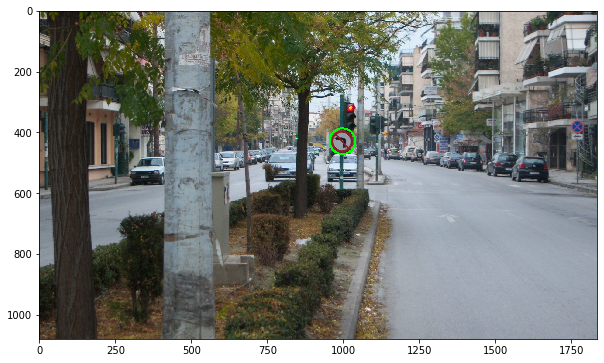

In [62]:
outra_imagem = cv2.imread("proibido_virar/01.jpg", cv2.IMREAD_COLOR)
imagem_com_placa = acha_placa_2(template, outra_imagem, 0.6)
mostra_imagem_rgb(imagem_com_placa)